### Загрузка данных и первичный анализ

Импорт библиотек

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Теперь загрузим датасет и проведем его анализ:

In [14]:
df = pd.read_csv('S05-hw-dataset.csv')

In [15]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [17]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [18]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

В датасете 3000 строк и 17 столбцов, включая целевой признак default
Пропусков вроде нет, значитвсе значения заполнены числовыми признаками. Правда есть странности типа отрицательного баланса на счёте (до −3000)(скорее всего долг, но всё же). Целевой признак default в свою очередь распределён неравномерно: примерно 2/5 — это те, кто ушёл в дефолт (класс 1).


### Подготовка признаков и таргета

Выделим матрицу признаков `X` и вектор таргета `y`

Но сначала удалим `client_id` - он в данный момент не нужен

А затем разделим на `X` и `y`

In [ ]:
df = df.drop(columns=['client_id'])
X = df.drop(columns=['default'])
y = df['default']
X.dtypes # проверяем, что все признаки числовые

age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

In [20]:
# Проверим диапазон признака debt_to_income
print("Минимум:", X['debt_to_income'].min())
print("Максимум:", X['debt_to_income'].max())

Минимум: 0.0061471149847966
Максимум: 0.878343349584274


Всё верно, debt_to_income находится в диаппазоне [0, 1]

### Train/Test-сплит и бейзлайн-модель

Разделяю данные на обучающую и тестовую выборки (80/20).  
Фиксирую `random_state` для повторяемости и`stratify=y`, чтобы сохранить пропорции классов в обеих выборках


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Создаём простую модель-бейзлайн, которая всегда предсказывает наиболее частый класс (`strategy="most_frequent"`)


In [31]:
fiktiv = DummyClassifier(strategy='most_frequent')
fiktiv.fit(X_train, y_train)
y_pred_fiktiv = fiktiv.predict(X_test)
y_proba_fiktiv = fiktiv.predict_proba(X_test)[:, 1]


Считаю accuracy и ROC-AUC для бейзлайна.  
Это наша стартовая точка — дальше будем сравнивать с логистической регрессией

In [32]:
acc_fiktiv = accuracy_score(y_test, y_pred_fiktiv)
roc_fiktiv = roc_auc_score(y_test, y_proba_fiktiv)
print(f"FiktivClassifier Accuracy: {acc_fiktiv:.3f}")
print(f"FiktivClassifier ROC-AUC: {roc_fiktiv:.3f}")

FiktivClassifier Accuracy: 0.590
FiktivClassifier ROC-AUC: 0.500


Бейзлайн просто всегда выбирает самый популярный класс, не глядя на признаки.  
Accuracy показывает, как часто он угадывает, а ROC-AUC = 0.5 — это как если бы модель просто угадывала (грубо говоря подкидывала бы монету)  
Такая модель нужна как точка отсчёта: если наша регрессия не лучше, значит, она не учится ничему полезному

### Логистическая регрессия и подбор гиперпараметров

При помощи GridSearchCV делаем предсказания на тестовой выборке

In [35]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [46]:
param_grid = {'logreg__C': [1.0]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.",{'logreg__C': [1.0]}
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter

Считаем accuracy и ROC-AUC — те же метрики, что и для бейзлайна, чтобы сравнение было честным

In [47]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)


Строим ROC-кривую для логистической регрессии и сохраняем в папку `figures`  
Она показывает, как модель ранжирует объекты по вероятности дефолта. Чем выше кривая над диагональю — тем лучше модель отличает классы.


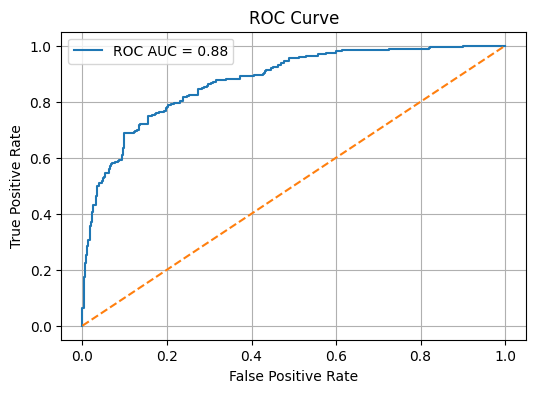

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.savefig('figures/roc_curve.png')
plt.show()


### Сравнение бейзлайна и логистической регрессии, текстовые выводы

Теперь собирём результаты бейзлайна и логистической регрессии в одну таблицу  
Так проще будет сравнивать метрики и наблюдать, насколько логистическая регрессия лучше на фоне наивной модели

In [50]:
results = pd.DataFrame({
    'Model': ['FiktivClassifier', 'LogisticRegression'],
    'Accuracy': [acc_fiktiv, acc],
    'ROC-AUC': [roc_fiktiv, roc]
})
display(results)
results.to_csv('artifacts/model_comparison.csv', index=False)

,Model,Accuracy,ROC-AUC
0,FiktivClassifier,0.59,0.500000
1,LogisticRegression,0.80,0.875614


Бейзлайн-модель (`FiktivClassifier`) просто предсказывает самый частый класс и не использует признаки. Accuracy этой модели - 0.59, а ROC-AUC — 0.50, что соответствует буквально случайному угадыванию.

Логистическая регрессия в свою очередь показала получше результаты: accuracy выросла до 0.80, а ROC-AUC — до 0.88. То есть, модель действительно учится отличать дефолтных клиентов от надёжных

При переборе параметра `C` качество немного менялось: то модель была переобобщённой, то переобучалась. Остановилась по-итогу на `C = 1.0`

Логистическая регрессия хорошо справляется с задачей бинарной классификации на этом датасете  
Даже простая модель даёт ощутимый прирост качества по сравнению с бейзлайном